<a href="https://colab.research.google.com/github/sadebuyukcukurlu/car_accidents/blob/main/Work_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sb
from traceback import print_tb
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns 

dataset="analiz.xlsx"

medeni_mutlu = pd.read_excel(dataset,"medeni_mutlu")
kaza=pd.read_excel(dataset,"kaza")
cinsi_mutlu=pd.read_excel(dataset,"cinsi_mutlu")
ilk_evlenme=pd.read_excel(dataset,"ilk_evlenme")
bosanma=pd.read_excel(dataset,"bosanma")

kaza_stun=kaza[["iller","kaza_sayısı"]]
medeni_stun = medeni_mutlu[["İl\nProvince",'Mutlu-Happy', "Unnamed: 7" ,
                            "Orta-Neither happy nor unhappy", "Unnamed: 13","Mutsuz-Unhappy", "Unnamed: 19"]]
ilkevlenme_stun=ilk_evlenme[["İl\nProvince","2020(r)","Unnamed: 32"]]
bosanma_stun=bosanma[["İl-Province","2020(r)"]]
cinsi_stun=cinsi_mutlu[["Mutlu\n","Orta\n","Mutsuz\n","il"]]

kaza_df=kaza_stun.drop(index=kaza_stun.index[0],axis=1)
kaza_df.rename(columns={"iller":"il"},inplace=True)
kaza_df.reset_index(drop=True,inplace=True)
kaza_df["il"] = [each.strip() for each in kaza_df["il"]]

cinsi_stun.rename(columns={"Mutlu\n":"Mutlu","Orta\n":"Nötr","Mutsuz\n":"Mutsuz"},inplace=True)
cinsi_df=cinsi_stun.drop(index=cinsi_stun.index[0:1],axis=1)
cinsi_df.reset_index(drop=True,inplace=True)
cinsi_df["il"]= [each.strip() for each in cinsi_df["il"]]

medeni_stun.rename(columns={"İl\nProvince":"il","Mutlu-Happy":"Evli_Mutlu","Unnamed: 7":"Evli_degil_Mutlu",
                            "Orta-Neither happy nor unhappy":"Evli_Nötr","Unnamed: 13":"Evli_degil_Nötr",
                            "Mutsuz-Unhappy":"Evli_Mutsuz","Unnamed: 19":"Evli_degil_Mutsuz"},inplace=True)
medeni_df=medeni_stun.drop(index=medeni_stun.index[0:3],axis=1)
medeni_df.reset_index(drop=True,inplace=True)
medeni_df["il"] = [each.strip() for each in medeni_df["il"]]

ilkevlenme_stun.rename(columns={"İl\nProvince":"il","2020(r)":"Erkek","Unnamed: 32":"Kadın"},inplace=True)
ilkevlenme_df=ilkevlenme_stun.drop(index=ilkevlenme_stun.index[0:2])
ilkevlenme_df.reset_index(drop=True,inplace=True)
ilkevlenme_df["il"] = [each.strip() for each in ilkevlenme_df["il"]]

bosanma_stun.rename(columns={"İl-Province":"il","2020(r)":"bosanma_sayisi"},inplace=True)
bosanma_df=bosanma_stun.drop(index=bosanma_stun.index[0],axis=1)
bosanma_df.reset_index(drop=True,inplace=True)
bosanma_df["il"] = [each.strip() for each in bosanma_df["il"]]

newdata = pd.merge(kaza_df,bosanma_df).merge(ilkevlenme_df).merge(medeni_df).merge(cinsi_df)
newdata["Evlenme_Yası"] = newdata[["Erkek","Kadın"]].mean(axis=1)
newdata.drop(columns=(["Erkek","Kadın"]),inplace=True)
newdata.drop(columns=(["il"]),inplace=True)
newdata[["Evli_Mutlu","Evli_degil_Mutlu","Evli_Nötr","Evli_degil_Nötr","Evli_Mutsuz","Evli_degil_Mutsuz",
         "Mutlu","Nötr","Mutsuz"]]=newdata[["Evli_Mutlu","Evli_degil_Mutlu","Evli_Nötr","Evli_degil_Nötr",
                                            "Evli_Mutsuz","Evli_degil_Mutsuz","Mutlu","Nötr","Mutsuz"]].astype(float)
newdata["Evlenme_Yası"]=[int(round(each)) for each in newdata["Evlenme_Yası"]]

newdata

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,kaza_sayısı,bosanma_sayisi,Evli_Mutlu,Evli_degil_Mutlu,Evli_Nötr,Evli_degil_Nötr,Evli_Mutsuz,Evli_degil_Mutsuz,Mutlu,Nötr,Mutsuz,Evlenme_Yası
0,23963,4332,56.44,46.11,31.28,34.80,12.27,19.09,53.00,32.45,14.54,27
1,2645,551,67.05,60.65,23.37,24.69,9.58,14.66,65.01,23.79,11.20,26
2,6626,979,78.44,69.87,13.00,16.53,8.57,13.60,76.43,13.82,9.75,25
3,1441,252,62.23,54.18,23.23,24.20,14.54,21.62,60.09,23.49,16.42,24
4,3270,463,68.37,57.57,25.73,32.16,5.90,10.27,66.02,27.13,6.85,26
...,...,...,...,...,...,...,...,...,...,...,...,...
76,3408,556,68.89,53.40,25.77,33.03,5.33,13.57,63.73,28.19,8.08,27
77,2321,326,58.23,51.90,32.92,33.44,8.85,14.66,56.38,33.07,10.54,27
78,900,155,62.25,56.45,23.67,23.35,14.08,20.20,60.85,23.59,15.56,25
79,4268,803,48.13,39.38,36.46,39.64,15.41,20.98,45.77,37.32,16.91,26


# Veri hakkında bilgi sahibi olunur.

In [ ]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kaza_sayısı        81 non-null     int64  
 1   bosanma_sayisi     81 non-null     int64  
 2   Evli_Mutlu         81 non-null     float64
 3   Evli_degil_Mutlu   81 non-null     float64
 4   Evli_Nötr          81 non-null     float64
 5   Evli_degil_Nötr    81 non-null     float64
 6   Evli_Mutsuz        81 non-null     float64
 7   Evli_degil_Mutsuz  81 non-null     float64
 8   Mutlu              81 non-null     float64
 9   Nötr               81 non-null     float64
 10  Mutsuz             81 non-null     float64
 11  Evlenme_Yası       81 non-null     int64  
dtypes: float64(9), int64(3)
memory usage: 8.2 KB


# Verinin istatistiksel değerleri konrtol edilir.

In [ ]:
newdata.describe()

,kaza_sayısı,bosanma_sayisi,Evli_Mutlu,Evli_degil_Mutlu,Evli_Nötr,Evli_degil_Nötr,Evli_Mutsuz,Evli_degil_Mutsuz,Mutlu,Nötr,Mutsuz,Evlenme_Yası
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.00000,81.000000,81.000000,81.000000
mean,12145.777778,1686.049383,63.436790,55.222963,26.762346,30.375679,9.800864,14.400988,61.15284,27.768272,11.079136,26.185185
std,30864.654340,3529.873411,7.649997,7.517119,5.969755,6.138973,4.064327,4.154485,7.53306,5.868062,3.966172,0.963212
min,444.000000,35.000000,43.210000,39.380000,13.000000,16.530000,4.430000,5.980000,41.98000,13.820000,5.550000,24.000000
25%,2321.000000,326.000000,58.780000,50.320000,23.190000,25.880000,7.230000,11.670000,56.54000,23.710000,8.310000,26.000000
50%,3878.000000,646.000000,62.450000,54.400000,26.450000,32.000000,8.410000,13.600000,60.39000,27.850000,9.860000,26.000000
75%,11084.000000,1768.000000,68.480000,60.650000,31.280000,35.040000,12.000000,16.480000,65.57000,32.450000,13.360000,27.000000
max,248727.000000,27616.000000,80.470000,72.440000,37.660000,41.490000,23.620000,27.880000,77.66000,38.510000,24.750000,29.000000


# Verilerin p değeri normallikleri hakkında bilgi verir.

In [ ]:
for i in newdata.columns:
  _, p  = stats.shapiro(newdata[i])
  print(f"{i} : {round(p,4)}")
  # P degeri <0.05 ise veri normal dağılmıyor

kaza_sayısı : 0.0
bosanma_sayisi : 0.0
Evli_Mutlu : 0.6948
Evli_degil_Mutlu : 0.1736
Evli_Nötr : 0.1331
Evli_degil_Nötr : 0.0114
Evli_Mutsuz : 0.0
Evli_degil_Mutsuz : 0.0182
Mutlu : 0.535
Nötr : 0.1289
Mutsuz : 0.0
Evlenme_Yası : 0.0


# P değerlerinden yola çıkarak verilerin çoğunluğunun  normal dağılmadıgı görülür.

In [ ]:
# Veri normal dağılmıyor ise  spearman 
spearman_corr=newdata.corr(method="spearman")
# Veri normal dağılıyor ise  pearson
pearson_corr=newdata.corr(method="pearson")
print(spearman_corr)

                   kaza_sayısı  bosanma_sayisi  Evli_Mutlu  Evli_degil_Mutlu  \
kaza_sayısı           1.000000        0.977202   -0.263984         -0.236462   
bosanma_sayisi        0.977202        1.000000   -0.281464         -0.240810   
Evli_Mutlu           -0.263984       -0.281464    1.000000          0.882530   
Evli_degil_Mutlu     -0.236462       -0.240810    0.882530          1.000000   
Evli_Nötr             0.382192        0.411106   -0.838437         -0.786230   
Evli_degil_Nötr       0.293917        0.295814   -0.683548         -0.794720   
Evli_Mutsuz          -0.079789       -0.076604   -0.648605         -0.507659   
Evli_degil_Mutsuz    -0.012433        0.001694   -0.571500         -0.607854   
Mutlu                -0.259283       -0.274527    0.989600          0.931459   
Nötr                  0.383993        0.402511   -0.816138         -0.804725   
Mutsuz               -0.066498       -0.064330   -0.662556         -0.578741   
Evlenme_Yası          0.252790        0.

# Veriler arasındaki korelasyon katsayısı grafiği;

Elde ettiğimiz korelasyon değerlerine baktığımızda;
 kaza sayısı ve boşanma sayısı arasında %98 pozitif yönlü bir ilişki olduğunu görmekteyiz. Bunun anlamı iki değerin birbirleriyle yüksek derecede ilişkisinin olduğudur.

boşanma sayısı ile nötr ve evli insanlar arasında %40 pozitif yönlü bir ilişki vardır. Bunun anlamı orta derecede bir ilişki olduğudur.

evli ve mutlu ile nört insanlar arasında da negatif yönlü %81 negatif yönlü bir ilişki vardır. Bunun anlamı birbirleriyle ilişkilerinin oldukça az olduğudur.



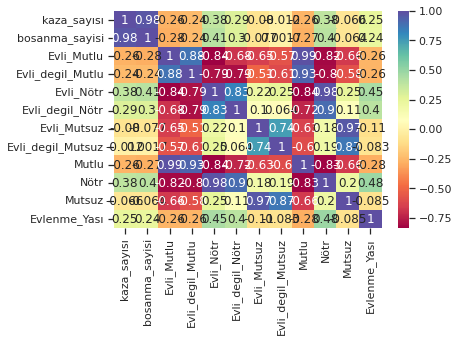

In [ ]:
sb.heatmap(spearman_corr, cmap="Spectral", annot=True,fmt=".2g")
# İncelenen grafikte mor renk olan sütunların birbirleri ile yüksek korelasyona sahip olduklarını görürüz.

# Tüm değerlerin birbilerine olan korelasyon değerlerinin grafiği;

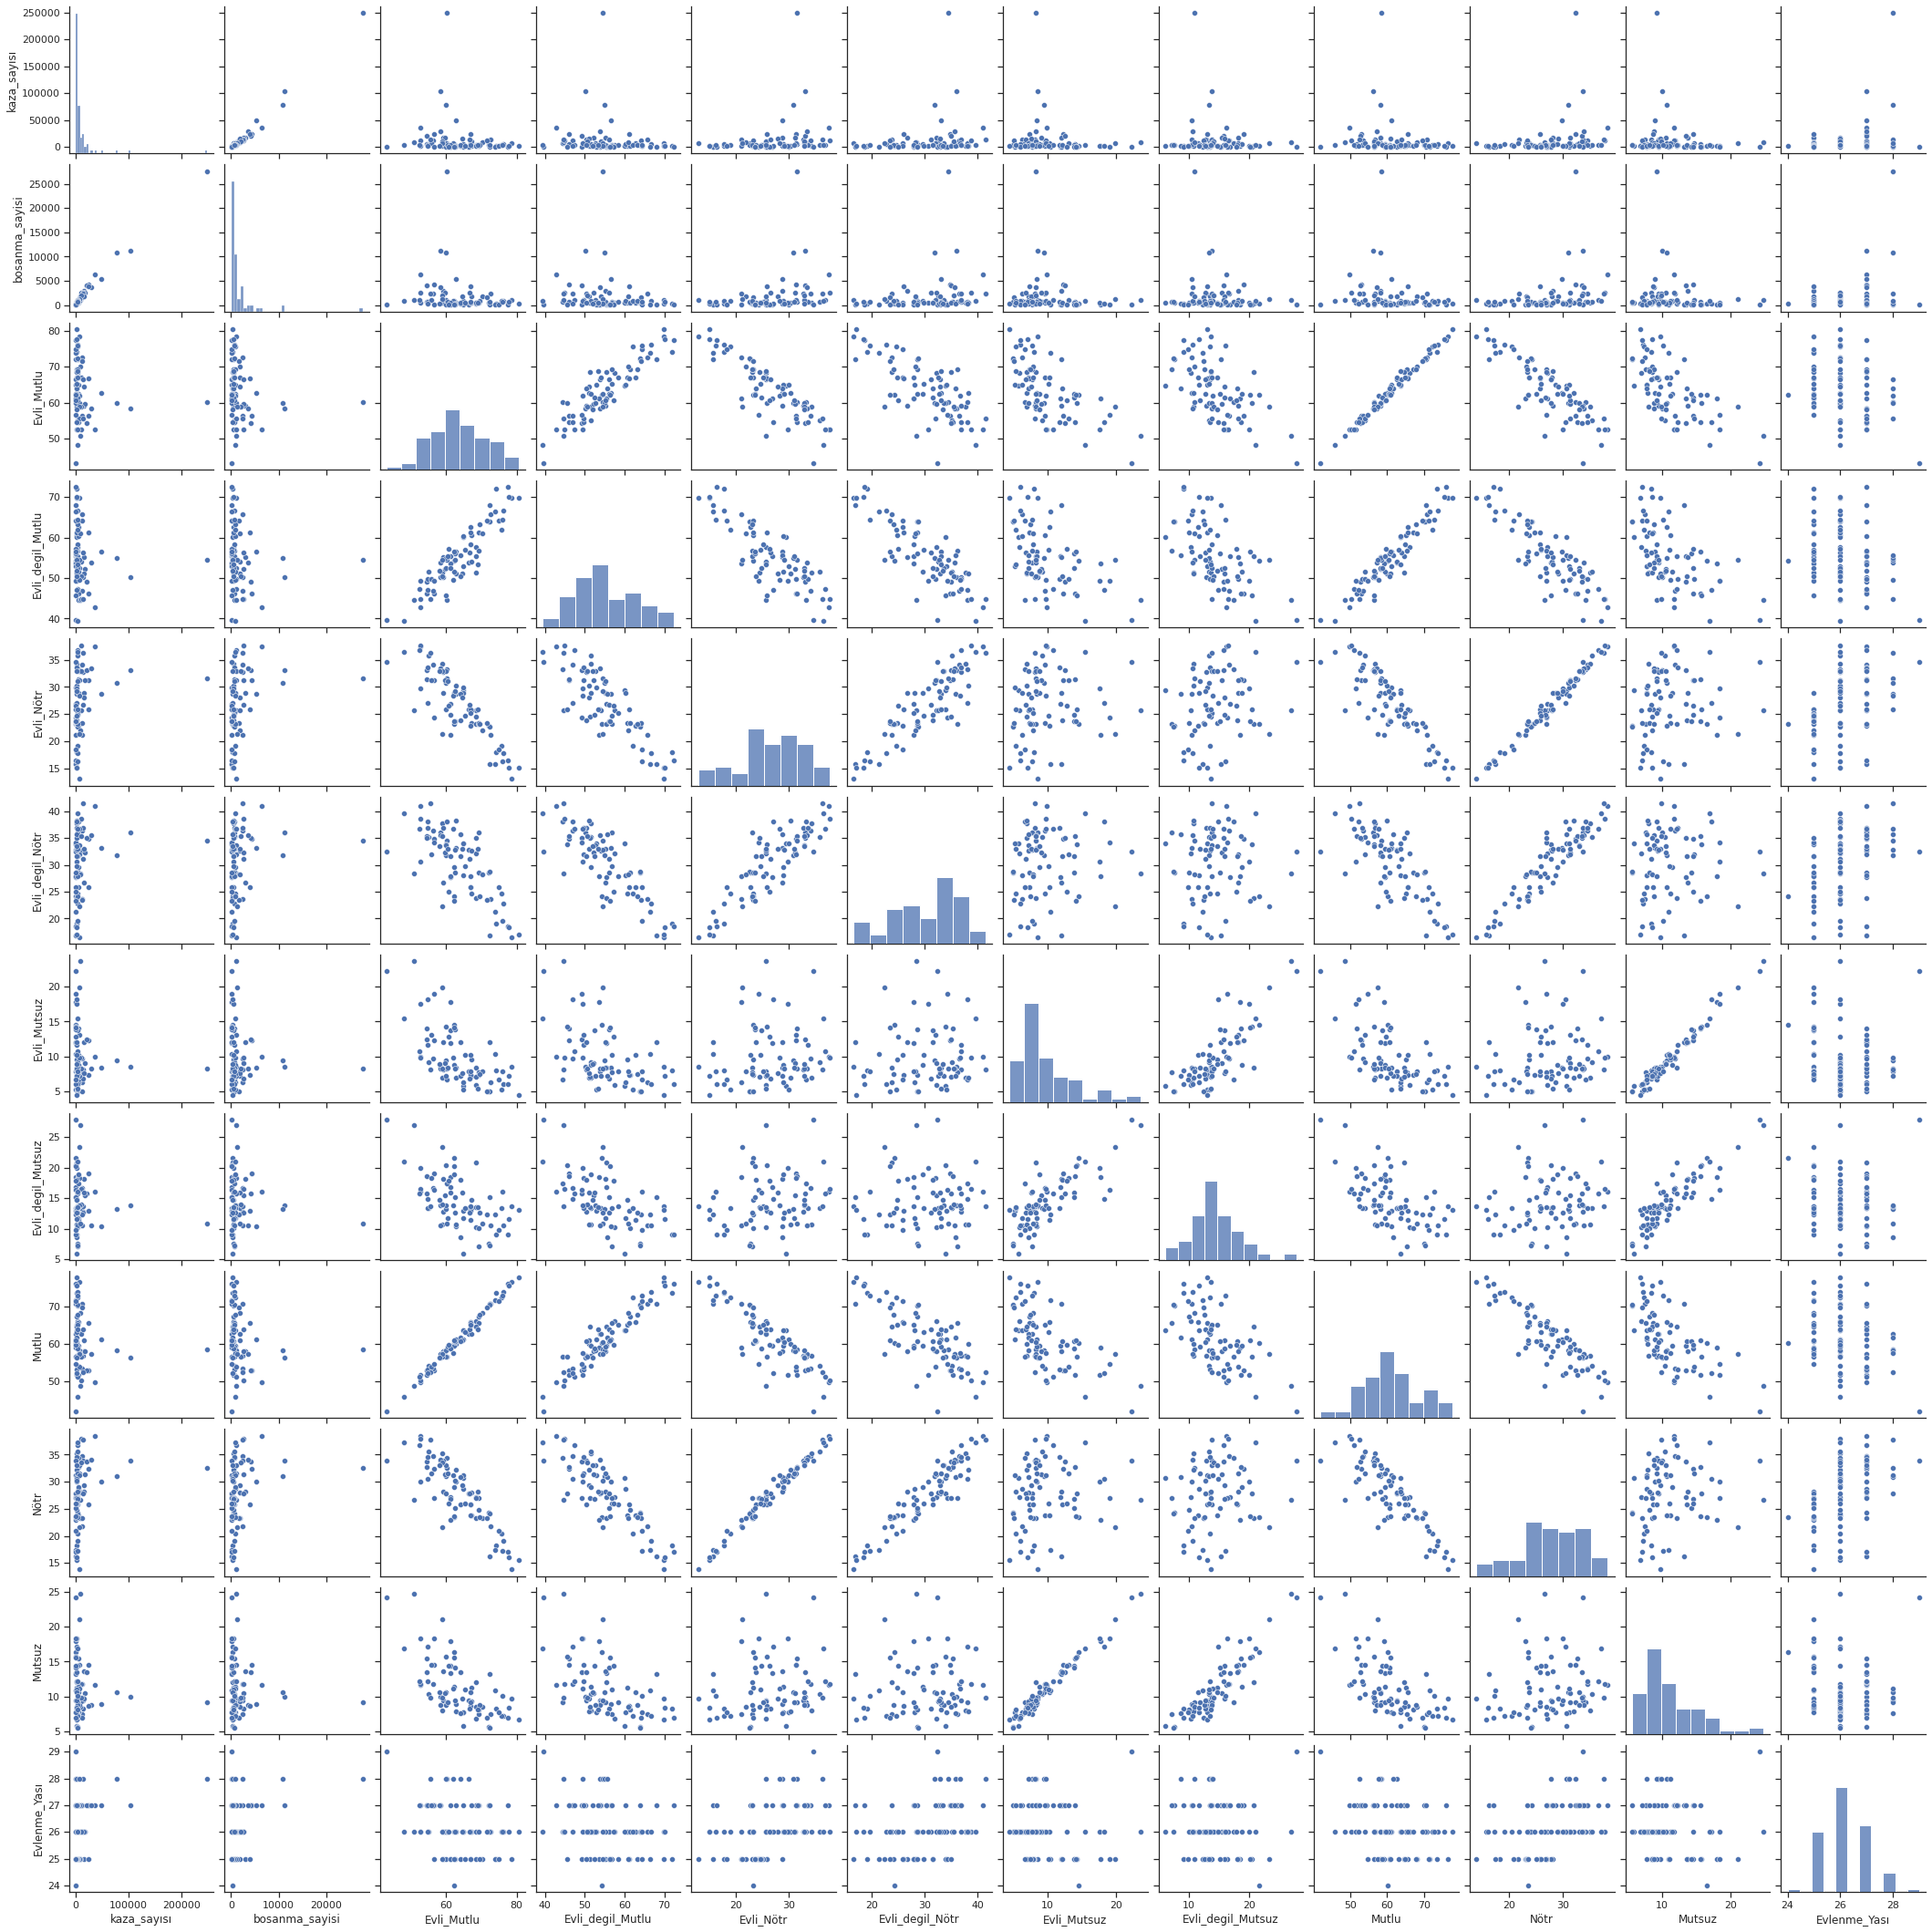

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(newdata)

# Boşanma sayısı ve kaza sayısı arasında %98 pozitif yönlü bir ilişki grafiği;

Text(0.5, 0, 'Boşanma Sayısı')

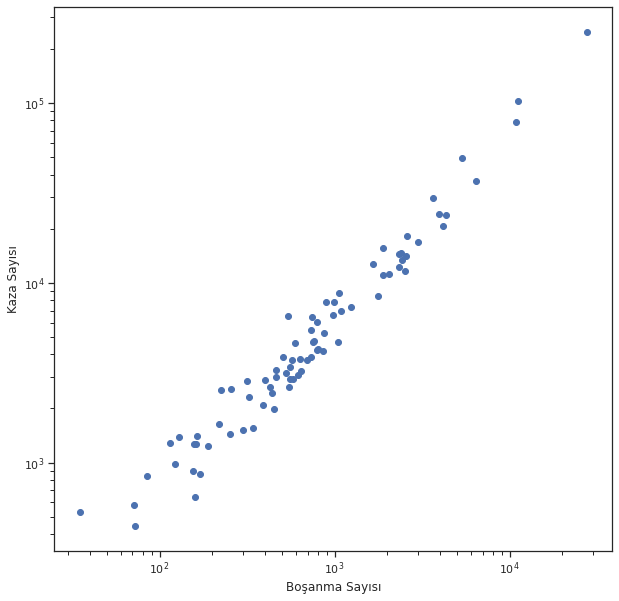

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(newdata["bosanma_sayisi"],newdata['kaza_sayısı'])
plt.ylabel("Kaza Sayısı")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Boşanma Sayısı")

# Kaza Sayısının Dağılım Grafiği ve Normalizasyonu

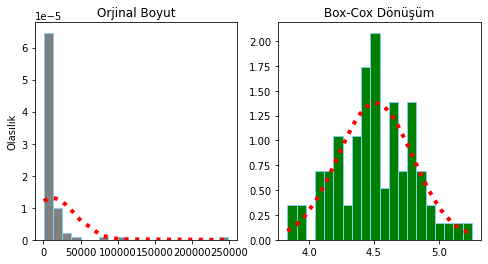

In [ ]:
kazasa = newdata.kaza_sayısı.sort_values()
kazasa_sr, lam = stats.boxcox(kazasa)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
# Orjinal
mean, std = stats.norm.fit(kazasa, loc=0)
pdf_norm = stats.norm.pdf(kazasa, mean, std)
ax1.hist(kazasa, bins= 20 , density=True
         ,color = "grey", ec= "skyblue")

ax1.plot(kazasa, pdf_norm
         ,color = "red", linewidth=4, linestyle=':')

ax1.set_ylabel('Olasılık')
ax1.set_title('Orjinal Boyut')
# Box-Cox Dönüşüm
mean, std = stats.norm.fit(kazasa_sr, loc=0)
pdf_norm_sk = stats.norm.pdf(kazasa_sr, mean, std)

ax2.hist(kazasa_sr, bins= 20, density=True
         ,color = "green", ec="skyblue")

ax2.plot(kazasa_sr, pdf_norm_sk
         ,color = "red", linewidth=4, linestyle=':')

ax2.set_title('Box-Cox Dönüşüm')
plt.show()

# Veride Outlier değerleri olup olmadığını kontrol ediyoruz;

In [ ]:
import numpy as np
from collections import Counter

def deteck_outlier(newdata,features):
    outlier_indices = []
    for c in features:
        #1. çeyrek
        Q1 = np.percentile(newdata[c],25)
        #3. çeyrek
        Q3 = np.percentile(newdata[c],75)
        #IQR 
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = newdata[(newdata[c]<Q1-outlier_step) | (newdata[c]>Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v>2)
    
    return multiple_outliers

In [ ]:
newdata.loc[deteck_outlier(newdata,["Evli_Mutlu","Evli_degil_Mutlu",
                                    "Evli_Nötr","Evli_degil_Nötr",
                                    "Evli_Mutsuz","Evli_degil_Mutsuz",
                                    "Mutlu","Nötr","Mutsuz","Evlenme_Yası","kaza_sayısı","bosanma_sayisi"])]

,kaza_sayısı,bosanma_sayisi,Evli_Mutlu,Evli_degil_Mutlu,Evli_Nötr,Evli_degil_Nötr,Evli_Mutsuz,Evli_degil_Mutsuz,Mutlu,Nötr,Mutsuz,Evlenme_Yası
61,646,160,43.21,39.68,34.55,32.44,22.24,27.88,41.98,33.82,24.20,29
20,8734,1061,50.76,44.63,25.62,28.42,23.62,26.95,48.67,26.58,24.75,26


In [ ]:
newdata = newdata.drop(deteck_outlier(newdata,["Evli_Mutlu","Evli_degil_Mutlu",
                                    "Evli_Nötr","Evli_degil_Nötr",
                                    "Evli_Mutsuz","Evli_degil_Mutsuz",
                                    "Mutlu","Nötr","Mutsuz","Evlenme_Yası","kaza_sayısı","bosanma_sayisi"]),axis= 0).reset_index(drop = True)

# Evlenme yaşına göre kaza sayısının aykırı değerlerin grafiksel gösterimi

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


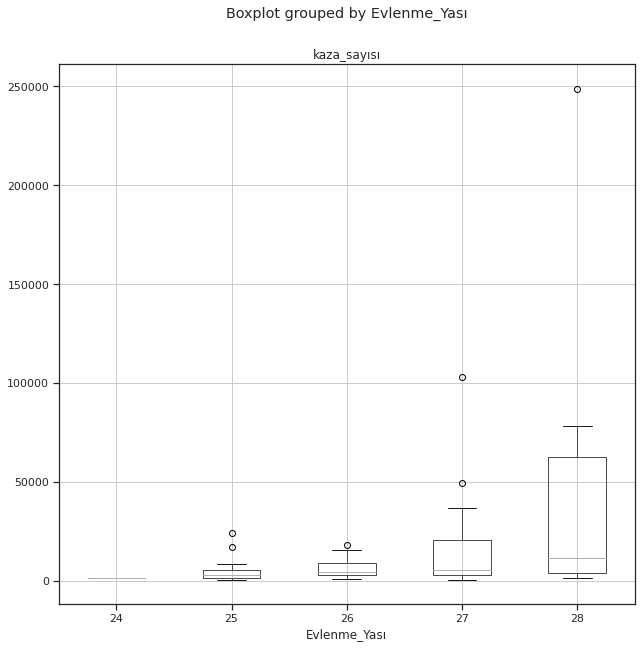

In [ ]:
newdata.boxplot(column = "kaza_sayısı",by = "Evlenme_Yası",figsize=(10,10))
plt.show()

SÜTUNLAR ARASI ÖRNEK İLİŞKİLER

# Evlenme yaşı ile kaza sayısı arasındaki ilişki;

Text(0.5, 0, 'Evlenme Yası')

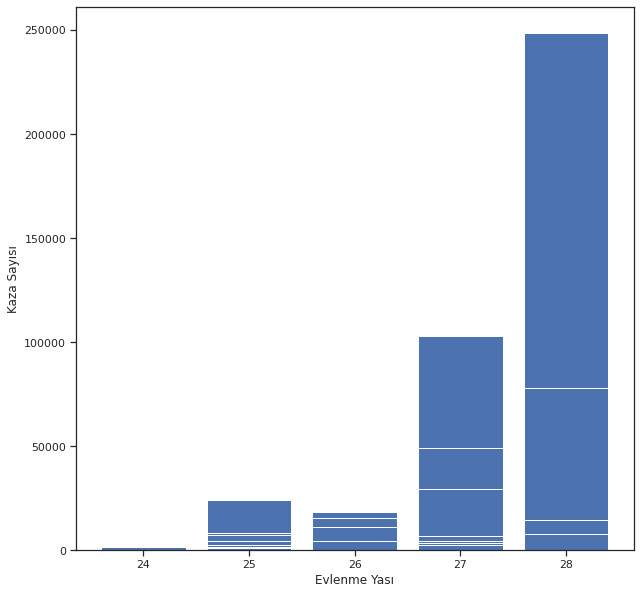

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(newdata["Evlenme_Yası"],newdata['kaza_sayısı'])
plt.ylabel("Kaza Sayısı")
plt.xlabel("Evlenme Yası")

# Ortalama kaza sayısı ile evlenme yaşı arasındaki ilişki;

Text(0.5, 0, 'Evlenme Yası')

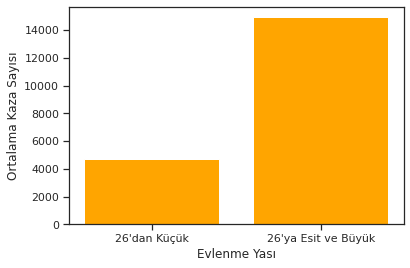

In [ ]:
y = [newdata[newdata["Evlenme_Yası"] < 26]["kaza_sayısı"].mean(),newdata[newdata["Evlenme_Yası"] >= 26]["kaza_sayısı"].mean()]
labels= ["26'dan Küçük","26'ya Esit ve Büyük"]
plt.bar(labels,y,color="orange")
plt.ylabel("Ortalama Kaza Sayısı")
plt.xlabel("Evlenme Yası")

# Ortalama kaza sayısının boşanma sayısı arasındaki ilişki;

Text(0.5, 0, 'Boşanma Sayısı')

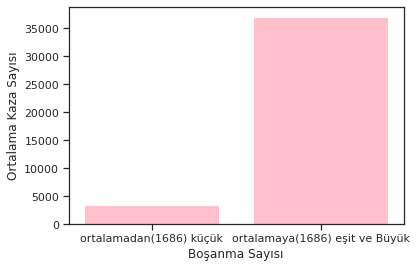

In [ ]:
y = [newdata[newdata["bosanma_sayisi"] < 1686]["kaza_sayısı"].mean(),newdata[newdata["bosanma_sayisi"] >= 1686]["kaza_sayısı"].mean()]
labels= ["ortalamadan(1686) küçük","ortalamaya(1686) eşit ve Büyük"]
plt.bar(labels,y,color="pink")
plt.ylabel("Ortalama Kaza Sayısı")
plt.xlabel("Boşanma Sayısı")

#Mutlu olan insanların kaza sayısının ortalaması ile arasındaki ilişki;

Text(0.5, 0, 'Mutlu İnsan Yüzdesi')

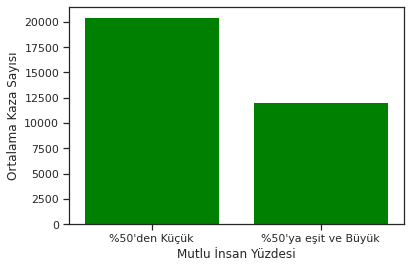

In [ ]:
y = [newdata[newdata["Mutlu"] < 50]["kaza_sayısı"].mean(),newdata[newdata["Mutlu"] > 50]["kaza_sayısı"].mean()]
labels= ["%50'den Küçük","%50'ya eşit ve Büyük"]
plt.bar(labels,y,color = "green")
plt.ylabel("Ortalama Kaza Sayısı")
plt.xlabel("Mutlu İnsan Yüzdesi")

#Nötr olan insanların kaza sayısının ortalaması ile arasındaki ilişki;

Text(0.5, 0, 'Nötr İnsan Yüzdesi')

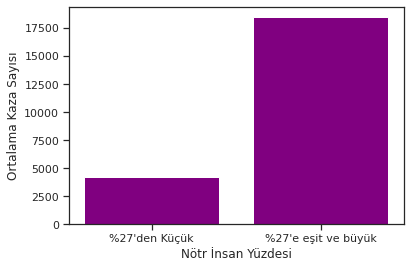

In [ ]:
y = [newdata[newdata["Nötr"] < 27]["kaza_sayısı"].mean(),newdata[newdata["Nötr"] >= 27]["kaza_sayısı"].mean()]
labels= ["%27'den Küçük","%27'e eşit ve büyük"]
plt.bar(labels,y,color="purple")
plt.ylabel("Ortalama Kaza Sayısı")
plt.xlabel("Nötr İnsan Yüzdesi")

#Mutsuz olan insanların kaza sayısının ortalaması ile arasındaki ilişki;

Text(0.5, 0, 'Mutsuz İnsan Yüzdesi')

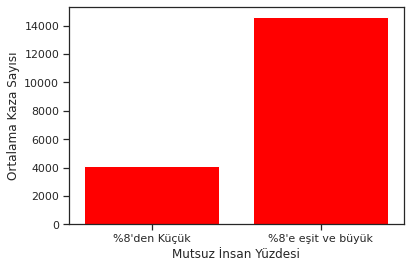

In [ ]:
y = [newdata[newdata["Mutsuz"] < 8]["kaza_sayısı"].mean(),newdata[newdata["Mutsuz"] >= 8]["kaza_sayısı"].mean()]
labels= ["%8'den Küçük","%8'e eşit ve büyük"]
plt.bar(labels,y,color="red")
plt.ylabel("Ortalama Kaza Sayısı")
plt.xlabel("Mutsuz İnsan Yüzdesi")